# Recognizing dogs and cats pictures using Keras

The pictures used to train the network are publicly available by microsoft at: https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

### Reading and resizing data

First let's read the images from our directory and plot the first one to see if it works

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATA_DIR = "" # Use this variable to specify a another dir than app root.
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

If you analyze the images you will see that some images are in landscape and some are portraits. Their sizes are differents too. Some are 500 x 400 others 500 x 450 and so on. So we need to normalize it

Let's resize our images to a 70x70 array and see if it's good

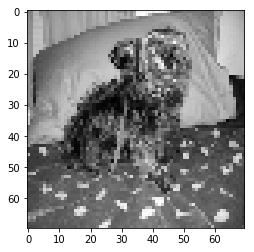

In [2]:
IMG_SIZE = 70
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

Ok it's look good! We can say if it's a dog or not.

Now let's define a function to create our training data. This function should read all the images like the test above and store it into an array with the 70x70 size

We're going to store the classification for the image too using the CATEGORIES index. 0 for dogs and 1 for cats

In [3]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()

In [4]:
print(len(training_data))

24946


Let's shuffle our training_data array because all the dog pictures are the first half of our array and the cat pictures are the second half. So we have to shuffle it otherwise the network will receive just dog images and then just cat images and it's not good for training

In [5]:
import random

random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
0
1
1
1
0
1


We create a X and y variables to store our features and the classification. Then we must reshape de features array so we can use it in keras.

In [7]:
X = []
y = []

In [8]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Let's use pickle library to save our X and y variables into files so we can read them with all the resizing and classification done. It's easier when you have to reopen the notebook and don't have to read all the images again.

In [2]:
import pickle

In [10]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

So when we want to read X and y quickly we can read as below

In [3]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

### Training the model

In [8]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

tf.__version__

'1.8.0'

We have to normalize the data to use it into our network. Since we are working with black and white images our pixel values are from 0 to 255. So let's divide all of them by 255 so we can normalize it from 0 to 1

In [9]:
X = X/255.0

Now we start creating our convolutional network. Let's start by creating a convolutional layer.
We create a convolutional layer with 64 nodes that use a 3x3 filter and say that our input shape is the shape of our images (70 x 70 x 1)
Then we create an activation layer using a relu function
And a pooling layer using 2 x 2 pool size

In [18]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

Now we create some more layers. We don't need to specify the input shape this time because the input of this layers is the output of the previous. We just need to specify the input shape in the first layers because that is the layer we are going to input out values. The other one's input is the previous output

In [19]:
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#converts the 3d feature maps to 1d feature vectors
model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

#loss could be categorical too. But since we just have two possibilities (dog or cat) we can use binary
model.compile(loss="binary_crossentropy", 
             optimizer="adam",
             metrics=['accuracy'])

Now we train our network :)

In [22]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)

Train on 19956 samples, validate on 4990 samples
Epoch 1/10
19956/19956 [==============================] - 7s 353us/step - loss: 0.0179 - acc: 0.9942 - val_loss: 0.7002 - val_acc: 0.8864
Epoch 2/10
19956/19956 [==============================] - 7s 344us/step - loss: 0.0258 - acc: 0.9919 - val_loss: 0.7092 - val_acc: 0.8834
Epoch 3/10
19956/19956 [==============================] - 7s 350us/step - loss: 0.0238 - acc: 0.9914 - val_loss: 0.7562 - val_acc: 0.8794
Epoch 4/10
19956/19956 [==============================] - 7s 353us/step - loss: 0.0157 - acc: 0.9951 - val_loss: 0.7105 - val_acc: 0.8840
Epoch 5/10
19956/19956 [==============================] - 7s 330us/step - loss: 0.0146 - acc: 0.9951 - val_loss: 0.8155 - val_acc: 0.8790
Epoch 6/10
19956/19956 [==============================] - 6s 324us/step - loss: 0.0263 - acc: 0.9917 - val_loss: 0.7483 - val_acc: 0.8832
Epoch 7/10
19956/19956 [==============================] - 8s 382us/step - loss: 0.0139 - acc: 0.9953 - val_loss: 0.8189 - v

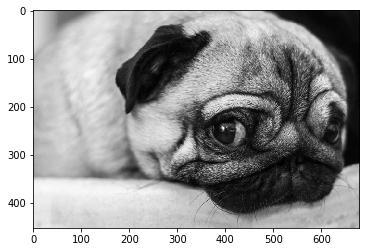

In [23]:
img_array = cv2.imread("teste/c1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap="gray")
plt.show()

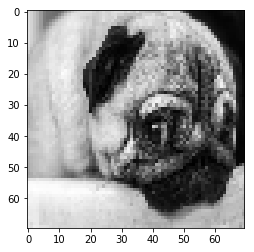

In [25]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [27]:
new_array = np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [31]:
predict = model.predict(new_array)

In [38]:
CATEGORIES[int(predict[0,0])]

'Dog'